## **EDA**

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
import pandas as pd

df = pd.read_csv("youtube_final_csv.csv")

print("Shape:", df.shape)
print("\nColumns ")
print(df.columns)

print("\nData Types ")
print(df.dtypes)

print("\nFirst 5 rows ")
print(df.head())

Shape: (50160, 16)

Columns 
Index(['video_id', 'title', 'topic', 'category_id', 'published_at',
       'duration_seconds', 'video_definition', 'captions_flag', 'channel_id',
       'channel_title', 'subscriber_count', 'total_videos', 'channel_age_days',
       'views', 'likes', 'comments'],
      dtype='object')

Data Types 
video_id            object
title               object
topic               object
category_id          int64
published_at        object
duration_seconds     int64
video_definition    object
captions_flag         bool
channel_id          object
channel_title       object
subscriber_count     int64
total_videos         int64
channel_age_days     int64
views                int64
likes                int64
comments             int64
dtype: object

First 5 rows 
      video_id                                              title  topic  \
0  0BkEej0H1VU  *SMALL* Apartment Makeover w/ Surprise REVEAL!...  Hobby   
1  nL6DN0CWRWI  transforming my apartment 🏡🌷 i got a new co

In [77]:
print("\n Missing Values ")
print(df.isna().sum())


 Missing Values 
video_id            0
title               0
topic               0
category_id         0
published_at        0
duration_seconds    0
video_definition    0
captions_flag       0
channel_id          0
channel_title       0
subscriber_count    0
total_videos        0
channel_age_days    0
views               0
likes               0
comments            0
dtype: int64


In [78]:
print("\n Numeric Summary ")
df.describe()


 Numeric Summary 


,category_id,duration_seconds,subscriber_count,total_videos,channel_age_days,views,likes,comments
count,50160.000000,50160.000000,5.016000e+04,50160.000000,50160.000000,5.016000e+04,5.016000e+04,50160.000000
mean,22.571531,2422.810825,2.977674e+06,5172.923405,3236.794597,2.709607e+06,3.010090e+04,1119.361643
std,6.164992,6201.971156,1.061033e+07,28809.301109,1826.909349,3.278482e+07,1.861561e+05,6548.073127
min,1.000000,240.000000,0.000000e+00,1.000000,3.000000,1.000000e+03,0.000000e+00,0.000000
25%,22.000000,630.000000,5.350000e+04,213.000000,1809.000000,2.033125e+04,4.250000e+02,29.000000
50%,24.000000,1199.000000,3.230000e+05,565.000000,3121.000000,1.385370e+05,2.630000e+03,141.000000
75%,27.000000,1990.000000,1.580000e+06,1505.000000,4581.000000,8.132555e+05,1.387225e+04,596.000000
max,29.000000,367231.000000,4.500000e+08,643411.000000,7446.000000,3.580474e+09,1.299725e+07,550394.000000


In [79]:
df[['duration_seconds','views','likes','comments','subscriber_count']].describe(percentiles=[0.9,0.95,0.99])

,duration_seconds,views,likes,comments,subscriber_count
count,50160.000000,5.016000e+04,5.016000e+04,50160.000000,5.016000e+04
mean,2422.810825,2.709607e+06,3.010090e+04,1119.361643,2.977674e+06
std,6201.971156,3.278482e+07,1.861561e+05,6548.073127,1.061033e+07
min,240.000000,1.000000e+03,0.000000e+00,0.000000,0.000000e+00
50%,1199.000000,1.385370e+05,2.630000e+03,141.000000,3.230000e+05
90%,3877.100000,3.642862e+06,5.417100e+04,2068.000000,6.460000e+06
95%,6935.000000,8.350141e+06,1.208562e+05,4223.000000,1.410000e+07
99%,33758.000000,3.751443e+07,4.719343e+05,15654.460000,4.380000e+07
max,367231.000000,3.580474e+09,1.299725e+07,550394.000000,4.500000e+08


- Engagement and subscriber metrics are extremely right-skewed, with the top 1% massively larger than the median, indicating heavy-tailed viral outliers.
- Video duration also has extreme outliers, with a 99th percentile of 33k seconds vs. a median of 1.2k seconds, suggesting the need for winsorization or log-scaling.

In [80]:
print("\n Unique Values per Column ")
for col in ['topic','category_id','video_definition','captions_flag','channel_id','channel_title']:
    print(f"{col}: {df[col].nunique()}")


 Unique Values per Column 
topic: 52
category_id: 15
video_definition: 2
captions_flag: 2
channel_id: 21706
channel_title: 21691


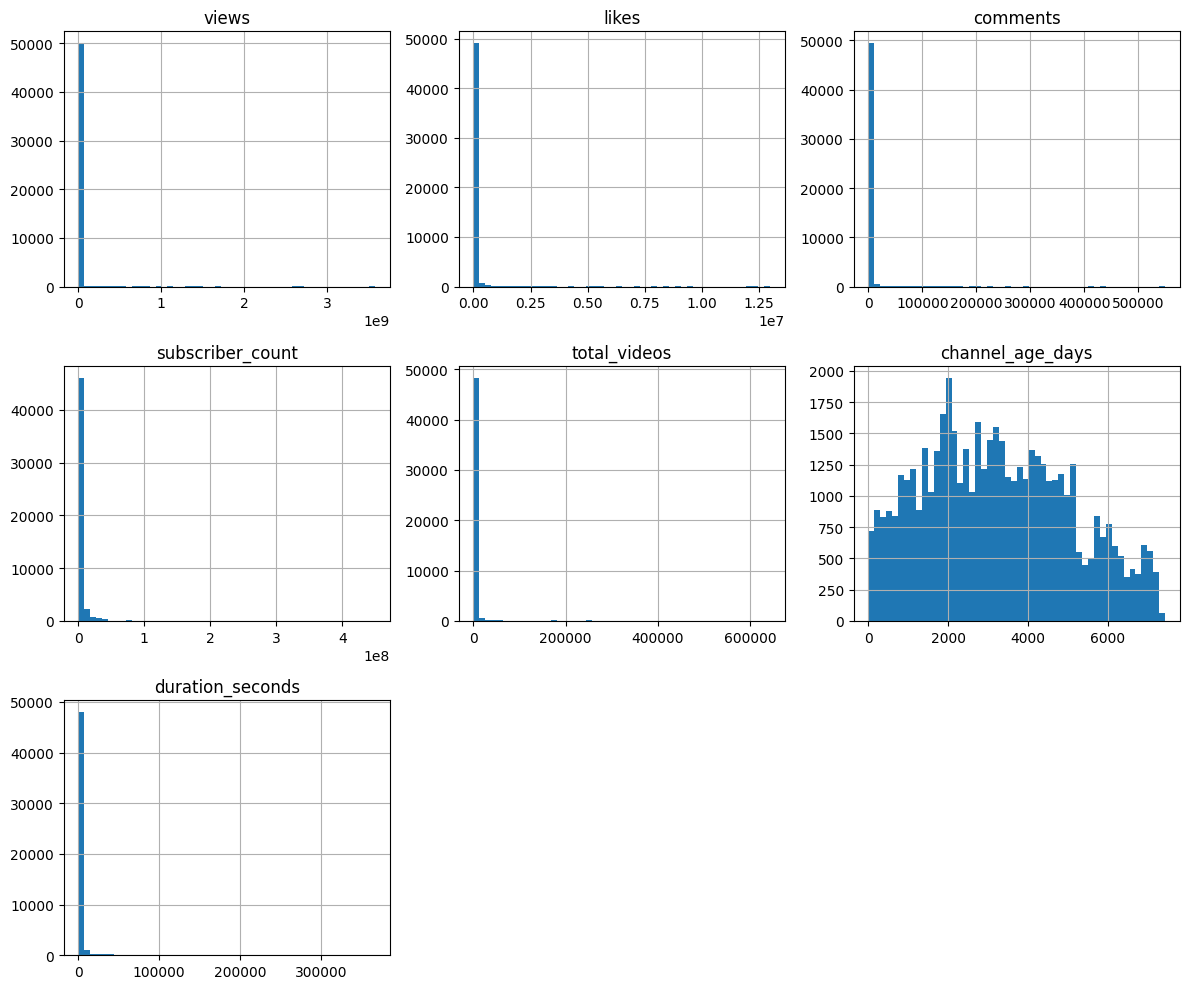

In [81]:
num_cols = ['views', 'likes', 'comments', 
            'subscriber_count', 'total_videos',
            'channel_age_days', 'duration_seconds']

df[num_cols].hist(figsize=(12, 10), bins=50)
plt.tight_layout()
plt.show()


- All engagement and channel-size metrics (views, likes, comments, subscriber_count, total_videos, duration_seconds) show extreme right-skew with very long tails. Most values are small, with a tiny number of massive outliers.

- channel_age_days is the only variable that shows a more uniform-like spread, reflecting natural variation in channel age.

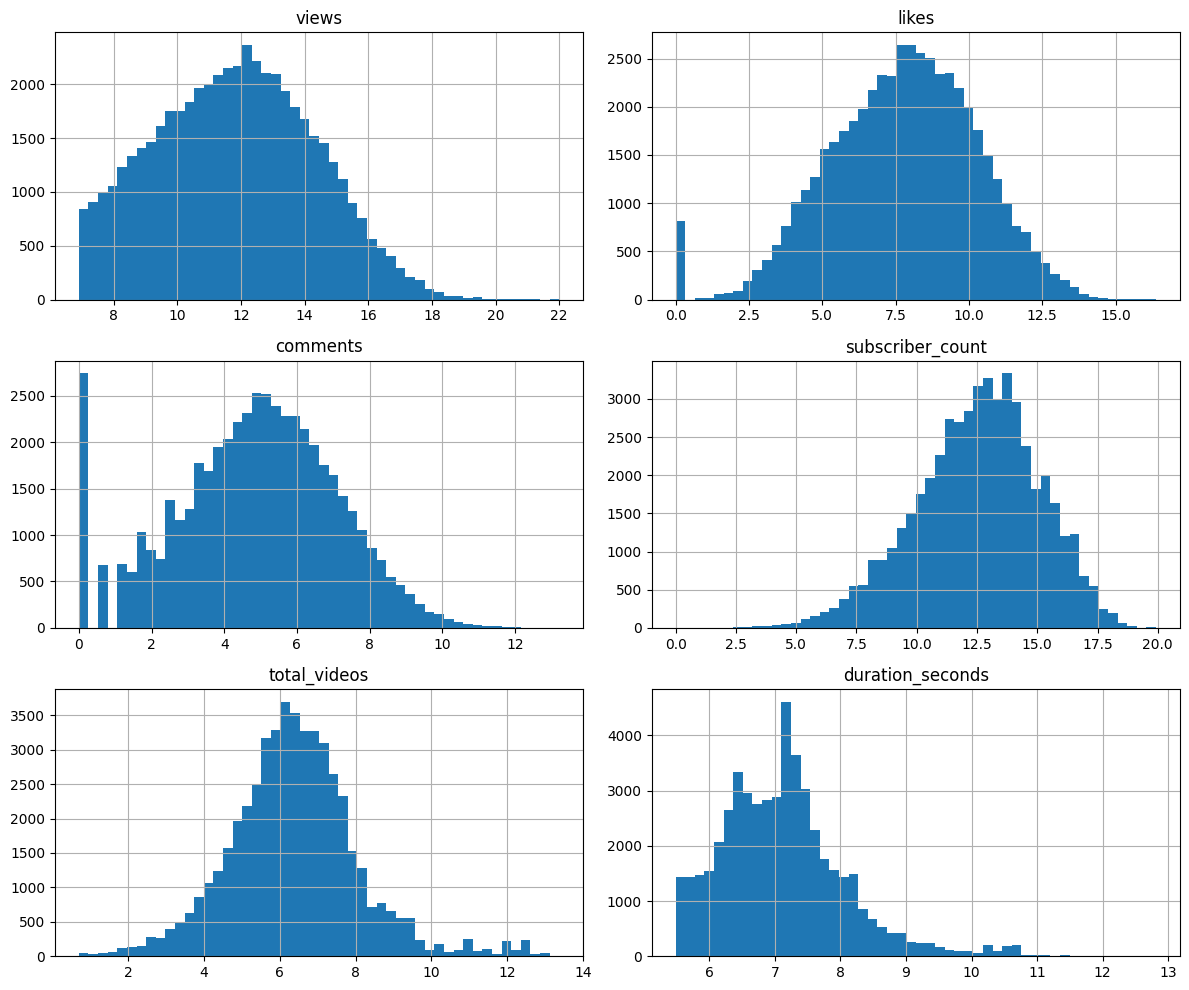

In [82]:
import numpy as np
import matplotlib.pyplot as plt

log_cols = ['views', 'likes', 'comments', 
            'subscriber_count', 'total_videos',
            'duration_seconds']

df_logs = df.copy()

for col in log_cols:
    df_logs[col] = np.log1p(df[col])

df_logs[log_cols].hist(figsize=(12, 10), bins=50)
plt.tight_layout()
plt.show()

- After applying log1p(), the previously skewed metrics become much more Gaussian-like, removing long tails and making patterns clearer.

- Log-transformation, for our dataset, is crucial for modeling since it stabilizes variance and reduces the impact of viral outliers.

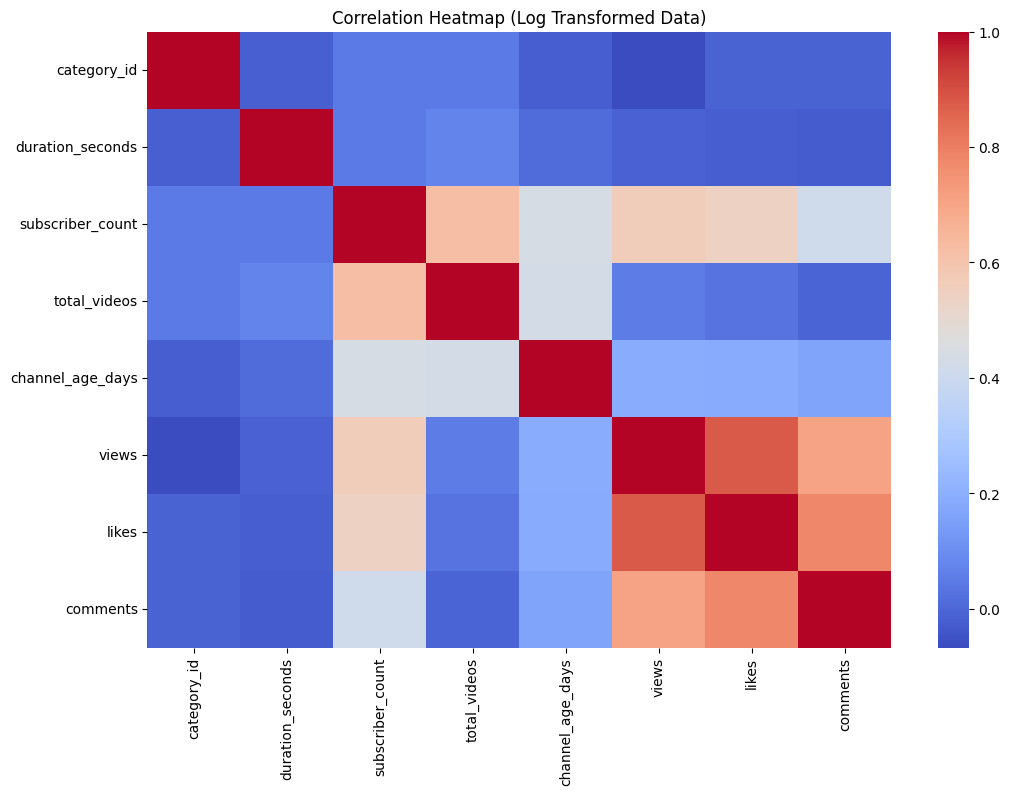

In [83]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap (Log Transformed Data)")
plt.show()

1. Engagement metrics correlate strongly with each other
views ↔ likes ↔ comments: ~0.7–0.9
→ Videos that get more views also get proportionally more likes and comments, indicating consistent engagement behavior.
2. Channel size strongly influences performance
subscriber_count → views: ~0.55–0.60
subscriber_count → likes/comments: ~0.50+
→ Larger channels systematically generate higher engagement regardless of content.
3. total_videos & channel_age_days also correlate with subscriber_count
subscriber_count ↔ total_videos: moderate (~0.45)
subscriber_count ↔ channel_age_days: moderate
→ Older, more active channels naturally accumulate bigger audiences.
4. Duration shows weak correlation with engagement
duration_seconds correlation with views/likes/comments ≈ small (~0.05–0.10)
→ Video length alone is not a meaningful predictor without category/topic context.
5. category_id has near-zero correlation with metrics
→ Category doesn’t directly drive performance; topic/content quality matters more.

In [84]:
for col in ['views','likes','comments','subscriber_count','total_videos','duration_seconds']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))).sum()
    print(f"{col}: {outliers} outliers")

views: 7650 outliers
likes: 7088 outliers
comments: 6724 outliers
subscriber_count: 7758 outliers
total_videos: 5672 outliers
duration_seconds: 4750 outliers


~10–15% of data points are outside the IQR range which is expected in heavy-tailed social media datasets.

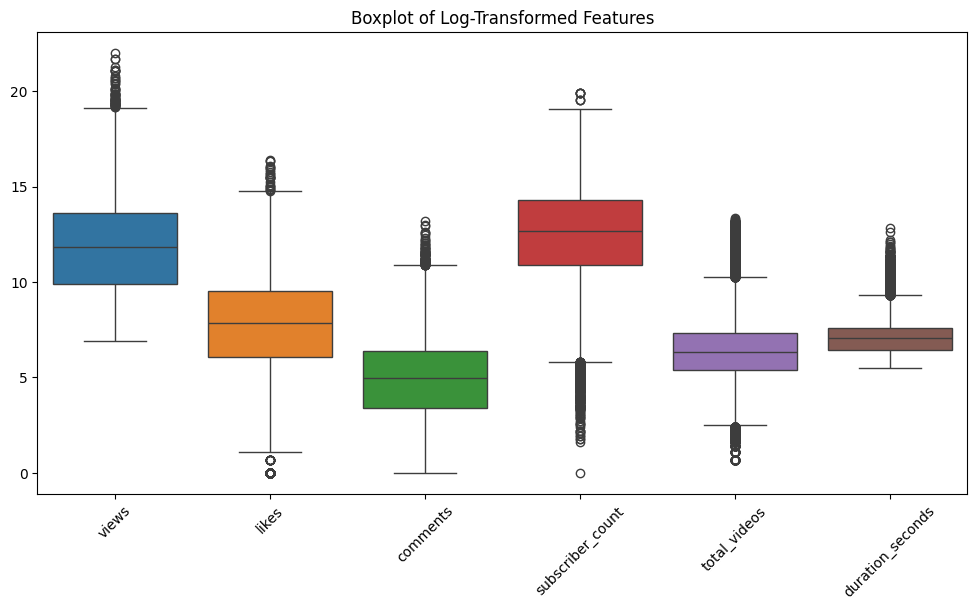

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_logs[['views','likes','comments','subscriber_count','total_videos','duration_seconds']])
plt.xticks(rotation=45)
plt.title("Boxplot of Log-Transformed Features")
plt.show()

Even after log-scaling, extreme-value points remain, showing true outliers due to viral videos & mega-channels.
Distributions are still wide but symmetric enough for modeling, confirming log-transform was necessary.

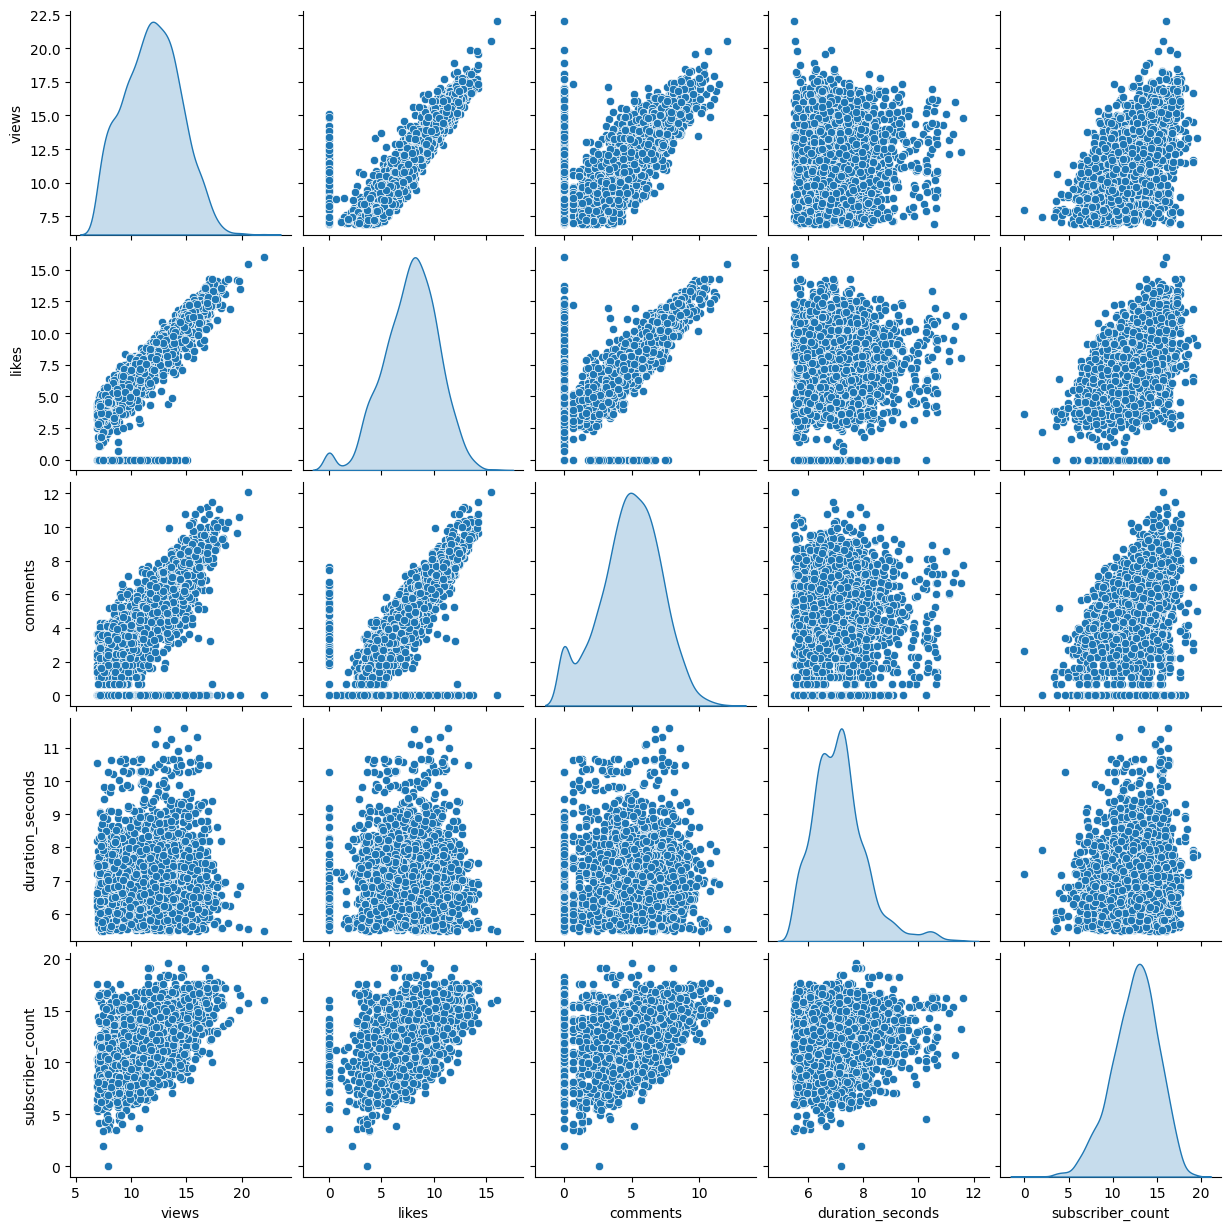

In [86]:
sample = df_logs.sample(3000, random_state=42)

sns.pairplot(
    sample[['views','likes','comments','duration_seconds','subscriber_count']],
    diag_kind='kde'
)
plt.show()

- Views, likes, and comments are tightly linked, showing that videos that get more views almost always attract more likes and comments as well.

- Subscriber count is positively related to engagement, but with a lot of spread, meaning a big channel helps, but it doesn’t guarantee high engagement.

- Video duration shows little to no direct correlation with performance, suggesting that simply making a longer or shorter video doesn’t improve results by itself.

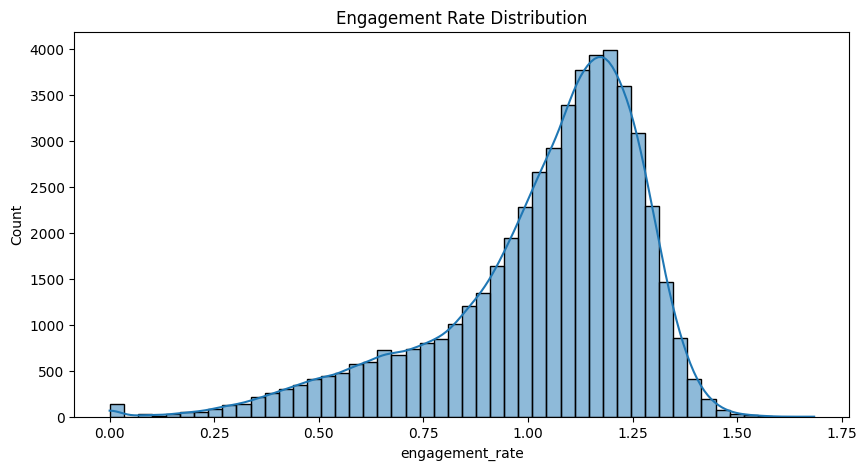

count    50160.000000
mean         1.037383
std          0.243239
min          0.000000
25%          0.929434
50%          1.098434
75%          1.207597
max          1.683892
Name: engagement_rate, dtype: float64

In [87]:
df['engagement_rate'] = (np.log1p(df['likes']) + np.log1p(df['comments'])) / np.log1p(df['views'])
plt.figure(figsize=(10,5))
sns.histplot(df['engagement_rate'], bins=50, kde=True)
plt.title("Engagement Rate Distribution")
plt.show()

df['engagement_rate'].describe()

Distribution centers around ~1.0, indicating most videos convert views into likes+comments at a stable ratio.
Spread is moderate, meaning engagement rate varies by topic and channel quality, making it a useful engineered feature.



 VIEWS 

 BEST MONTHS 


,views
month,
1,4.706380e+06
12,4.155483e+06
3,4.024856e+06
5,3.515604e+06
4,3.071684e+06
2,3.005900e+06
7,2.731432e+06
9,2.684852e+06
6,2.654006e+06



 BEST WEEKDAYS 


,views
weekday,
Wednesday,3.706382e+06
Thursday,2.968213e+06
Tuesday,2.649901e+06
Friday,2.603964e+06
Saturday,2.540661e+06
Monday,2.291083e+06
Sunday,2.273195e+06



 BEST HOURS 


,views
hour,
17,5.599791e+06
0,5.382999e+06
6,3.609066e+06
7,3.451050e+06
14,3.371578e+06
20,3.316200e+06
22,3.237910e+06
16,3.159940e+06
2,3.026532e+06



 BEST YEARS 


,views
year,
2009,1.839005e+08
2011,2.136791e+07
2010,2.135759e+07
2014,1.691419e+07
2016,1.410642e+07
2013,1.347876e+07
2012,1.293084e+07
2015,9.227824e+06
2017,8.051620e+06


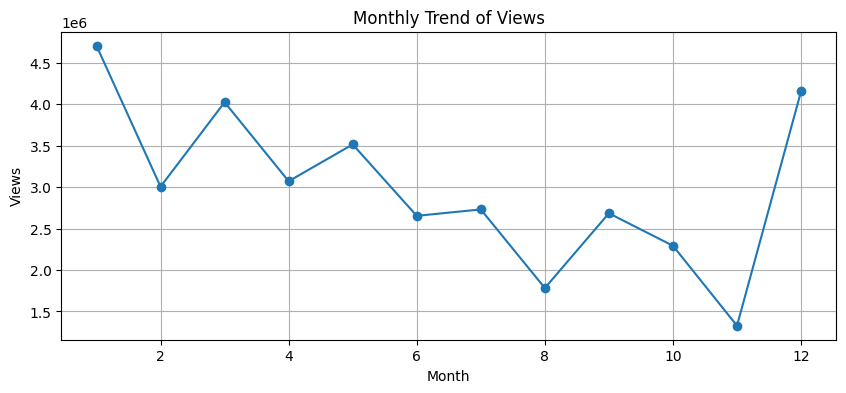

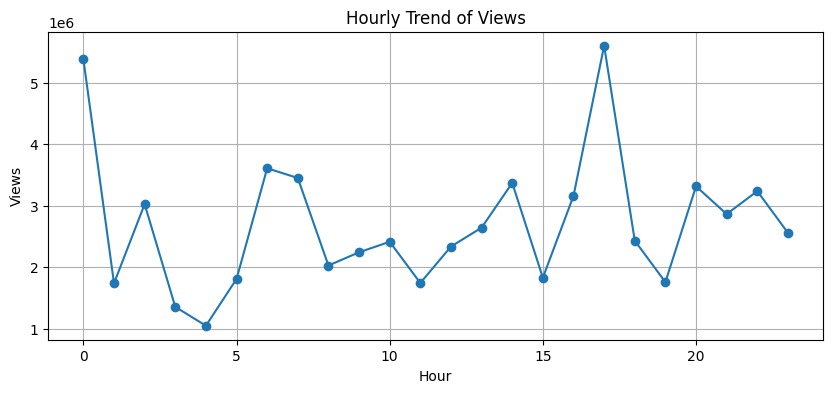

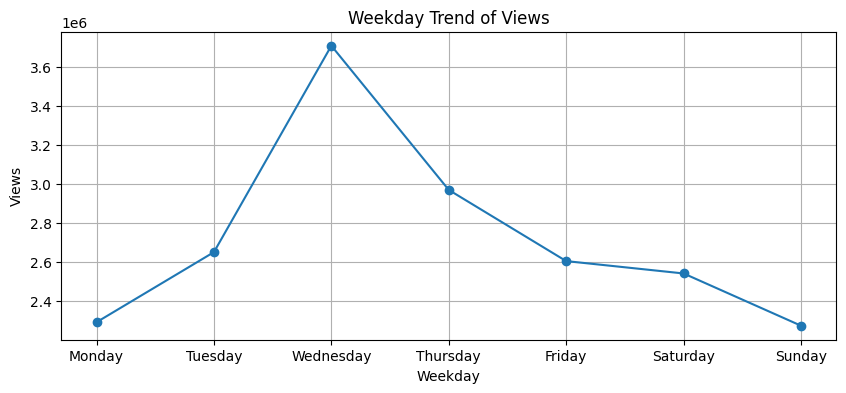



 LIKES 

 BEST MONTHS 


,likes
month,
1,46055.370702
2,43077.511054
12,41096.223857
3,40329.724785
4,37059.434231
5,35240.113561
9,30189.606815
7,30079.803909
6,29977.639149



 BEST WEEKDAYS 


,likes
weekday,
Friday,33376.235453
Wednesday,33085.820764
Saturday,30928.497092
Thursday,30167.280601
Tuesday,28148.704928
Monday,27905.290048
Sunday,26759.824864



 BEST HOURS 


,likes
hour,
6,41463.660445
17,41225.985092
20,40837.665172
0,39548.222772
14,38776.522345
16,36347.737941
21,34812.977671
2,31337.413759
18,31090.607752



 BEST YEARS 


,likes
year,
2009,939678.047619
2010,131764.645833
2011,121765.416667
2013,103887.267857
2012,93502.210145
2015,92593.552863
2016,85508.351878
2014,84377.928571
2019,74811.899738


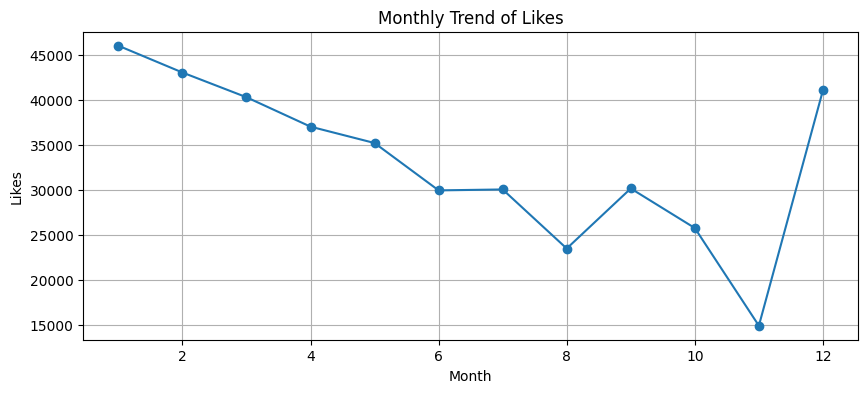

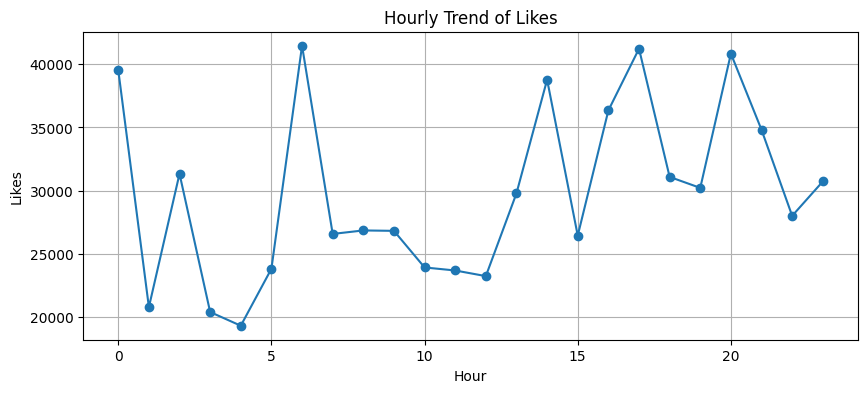

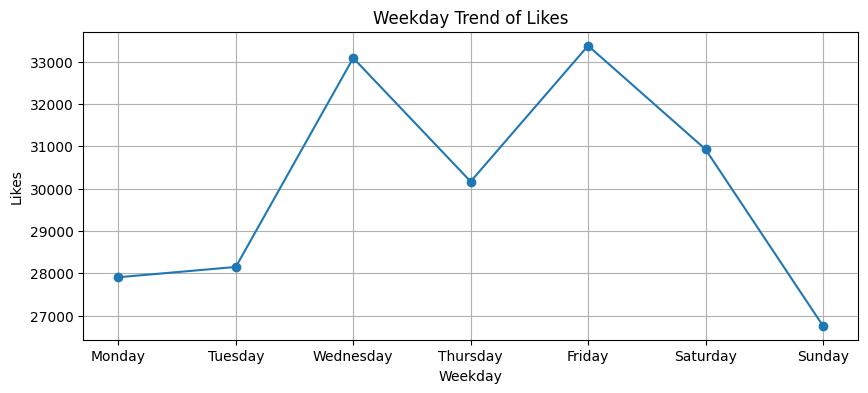



 COMMENTS 

 BEST MONTHS 


,comments
month,
1,1504.730055
2,1451.023581
3,1346.155266
4,1337.567007
12,1322.993241
5,1253.180816
9,1174.888161
10,1160.163980
7,1126.872307



 BEST WEEKDAYS 


,comments
weekday,
Friday,1292.718176
Wednesday,1196.551472
Saturday,1172.236914
Thursday,1083.172656
Tuesday,1078.909477
Sunday,1062.322277
Monday,919.669755



 BEST HOURS 


,comments
hour,
0,1589.717822
20,1477.865471
19,1429.790528
23,1427.642094
16,1410.343824
6,1405.148600
17,1353.944292
21,1340.330144
22,1289.586431



 BEST YEARS 


,comments
year,
2009,38370.142857
2010,4901.354167
2011,4103.708333
2012,4008.405797
2013,3698.178571
2015,3073.295154
2016,3006.974965
2019,2653.008924
2018,2473.915972


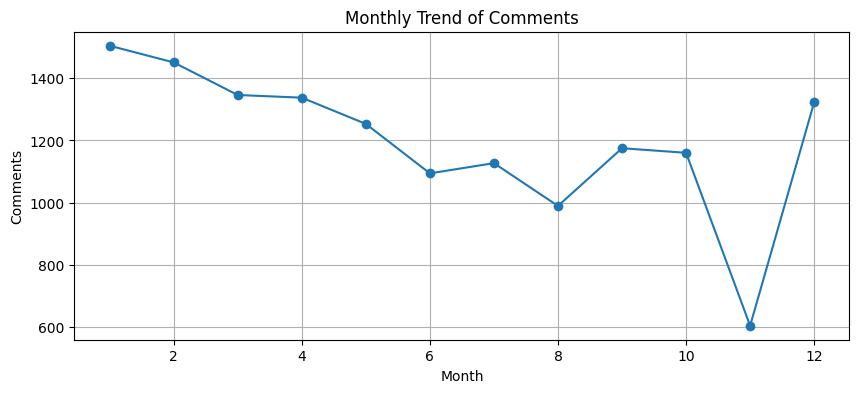

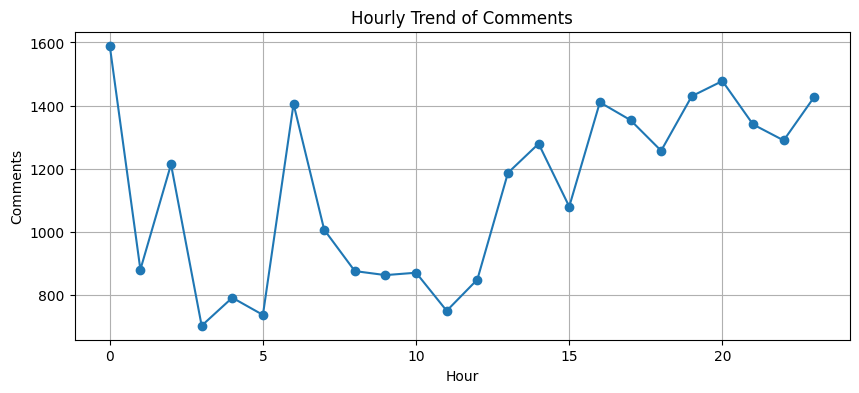

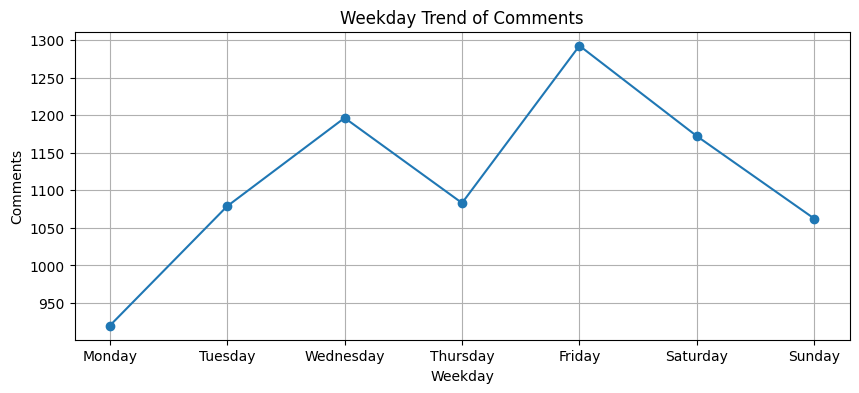



 ENGAGEMENT_RATE 

 BEST MONTHS 


,engagement_rate
month,
2,1.060383
6,1.058802
3,1.053916
1,1.052961
5,1.050125
7,1.045865
8,1.045335
4,1.039013
10,1.038283



 BEST WEEKDAYS 


,engagement_rate
weekday,
Sunday,1.049047
Friday,1.046349
Wednesday,1.036644
Saturday,1.036234
Thursday,1.034110
Tuesday,1.033635
Monday,1.023011



 BEST HOURS 


,engagement_rate
hour,
17,1.074119
16,1.073572
14,1.065453
20,1.063954
19,1.062315
22,1.059944
15,1.058043
21,1.052872
18,1.051636



 BEST YEARS 


,engagement_rate
year,
2019,1.082458
2021,1.075125
2009,1.071938
2020,1.061860
2022,1.055924
2024,1.049613
2018,1.044533
2023,1.043446
2025,1.023993


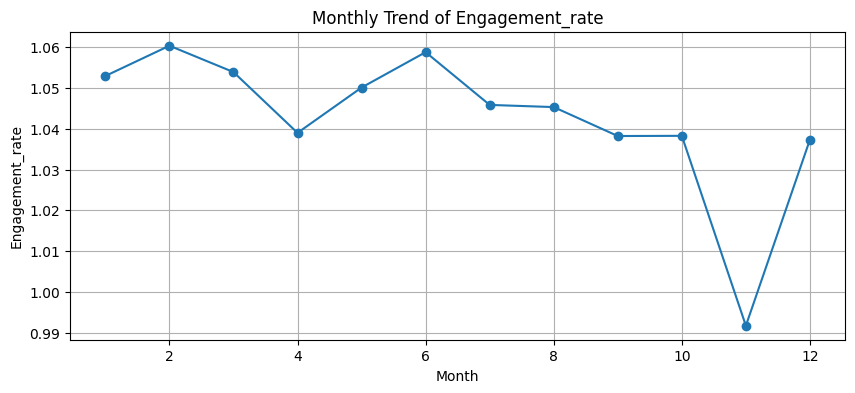

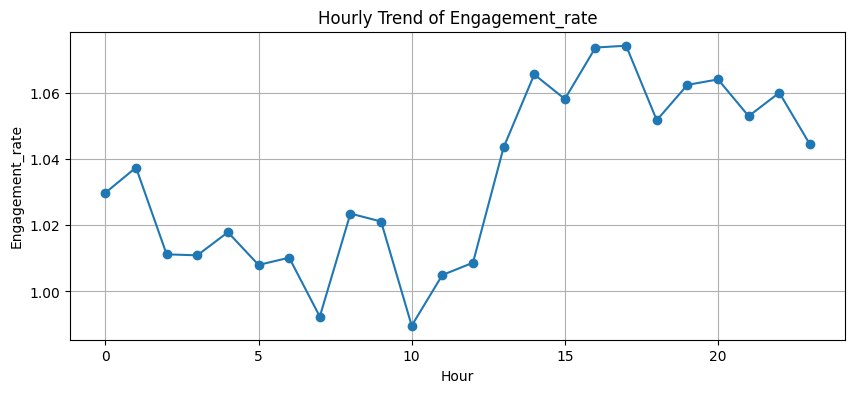

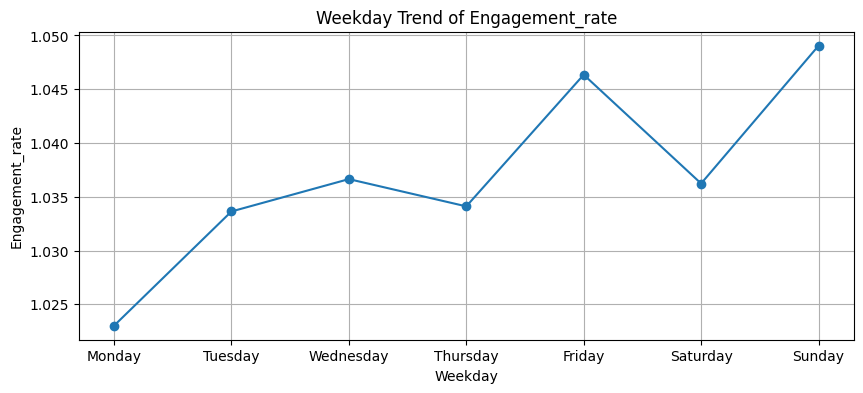

In [88]:
# Datetime Feature Extraction

df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')

df['year'] = df['published_at'].dt.year
df['month'] = df['published_at'].dt.month
df['weekday'] = df['published_at'].dt.day_name()
df['hour'] = df['published_at'].dt.hour

# Engagement Rate (Target)

df['engagement_rate'] = (
    np.log1p(df['likes']) + np.log1p(df['comments'])
) / np.log1p(df['views'])

def publishing_patterns(df, metric='views'):
    print(f"\n\n {metric.upper()} ")

    # Month
    print("\n BEST MONTHS ")
    display(df.groupby('month')[metric].mean().sort_values(ascending=False).to_frame())

    # Weekday
    print("\n BEST WEEKDAYS ")
    display(df.groupby('weekday')[metric].mean().sort_values(ascending=False).to_frame())

    # Hour
    print("\n BEST HOURS ")
    display(df.groupby('hour')[metric].mean().sort_values(ascending=False).to_frame())

    # Year
    print("\n BEST YEARS ")
    display(df.groupby('year')[metric].mean().sort_values(ascending=False).to_frame())

    # Line Plots to see the trend
    
    # Trend plot by Month
    plt.figure(figsize=(10,4))
    df.groupby('month')[metric].mean().plot(marker='o')
    plt.title(f"Monthly Trend of {metric.capitalize()}")
    plt.xlabel("Month")
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.show()

    # Trend plot by Hour
    plt.figure(figsize=(10,4))
    df.groupby('hour')[metric].mean().plot(marker='o')
    plt.title(f"Hourly Trend of {metric.capitalize()}")
    plt.xlabel("Hour")
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.show()

    # Trend plot by Weekday
    weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    plt.figure(figsize=(10,4))
    df.groupby('weekday')[metric].mean().loc[weekday_order].plot(marker='o')
    plt.title(f"Weekday Trend of {metric.capitalize()}")
    plt.xlabel("Weekday")
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.show()

for metric in ['views', 'likes', 'comments', 'engagement_rate']:
    publishing_patterns(df, metric)
